In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import tensorflow as tf 
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,Flatten,Dropout,MaxPool2D,Dense
from keras.models import Sequential,load_model
from keras.utils import to_categorical


In [47]:
data=[]
labels=[]
classes=43
cur_path='F:/traffic sign dataset'
#print(cur_path)
for i in range(classes):
    path=os.path.join(cur_path,'Train',str(i))
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(path+"\\"+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("error in loading the images")
data=np.array(data)
labels=np.array(labels)


In [41]:
print(data.shape,labels.shape)
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [49]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32 , epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 116s 4ms/step - loss: 2.0983 - accuracy: 0.4554 - val_loss: 0.7768 - val_accuracy: 0.8076
Epoch 2/15
31367/31367 [==============================] - 120s 4ms/step - loss: 0.7966 - accuracy: 0.7638 - val_loss: 0.2489 - val_accuracy: 0.9471
Epoch 3/15
31367/31367 [==============================] - 119s 4ms/step - loss: 0.4902 - accuracy: 0.8563 - val_loss: 0.1703 - val_accuracy: 0.9566
Epoch 4/15
31367/31367 [==============================] - 125s 4ms/step - loss: 0.3582 - accuracy: 0.8976 - val_loss: 0.1266 - val_accuracy: 0.9654
Epoch 5/15
31367/31367 [==============================] - 125s 4ms/step - loss: 0.3328 - accuracy: 0.9045 - val_loss: 0.0930 - val_accuracy: 0.9763
Epoch 6/15
31367/31367 [==============================] - 125s 4ms/step - loss: 0.2995 - accuracy: 0.9131 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 7/15
31367/31367 [==============================] - 125s 

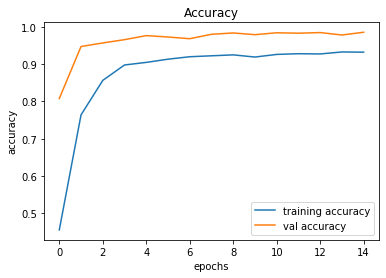

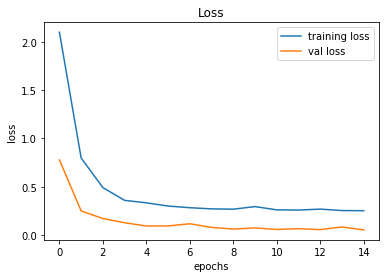

In [56]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [58]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save(‘traffic_classifier.h5’)

SyntaxError: invalid character in identifier (<ipython-input-58-e4d275e8065d>, line 15)